<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/uncertainPeriodicFrequentPatterns/basic/UPFPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Periodic Frequent patterns in Uncertain Temporal Databases using UPFPGrowth

This tutorial has two parts. In the first part, we describe the basic approach to find Uncertain Periodic Frequent patterns in a temporal database using the UPFPGrowth algorithm. In the final part, we describe an advanced approach, where we evaluate the UPFPGrowth algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [1]:
!pip install -U pami #install the pami repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.9/883.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 87.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.2 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=5c1d770b356005c068f2ce6bb3f266b09dd8144195ec1872fd389a81fea52672
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=ed88a07c8383458675246d971e70a21641742ce7134d8bd80ca9d33f143521f5
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


2.   Downloading a sample dataset

In [ ]:
inputFile = 'uncertain_Temporal_T10I4D200K.csv' #download a sample uncertain temporal database

3.   Printing few lines of a dataset to know its format.

In [3]:
!head -2 uncertain_Temporal_T10I4D200K.csv

1	25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834:0.688	0.758	0.612	0.44	0.249	0.862	0.523	0.472	0.334	0.093	0.808	0.73	0.04	0.385	0.229	0.151 
2	39	120	124	205	401	581	704	814	825	834:0.524	0.817	0.512	0.652	0.872	0.713	0.834	0.756	0.816	0.49 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Uncertain Periodic Frequent patterns using UPFPGrowth

### Step 1: Understanding the statistics of a database to choose an appropriate minimum support (minSup) value.

In [4]:
#import the class file
import PAMI.extras.dbStats.uncertainTemporalDatabaseStats as stats

#specify the file name
inputFile = 'uncertain_Temporal_T10I4D200K.csv'

#initialize the class
obj=stats.uncertainTemporalDatabaseStats(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 200000
Total number of items : 870
Database sparsity : 0.988388183908046
Minimum Transaction Size : 1
Average Transaction Size : 10.10228
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.66716768114031
Variance in Transaction Sizes : 13.448186042530212


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

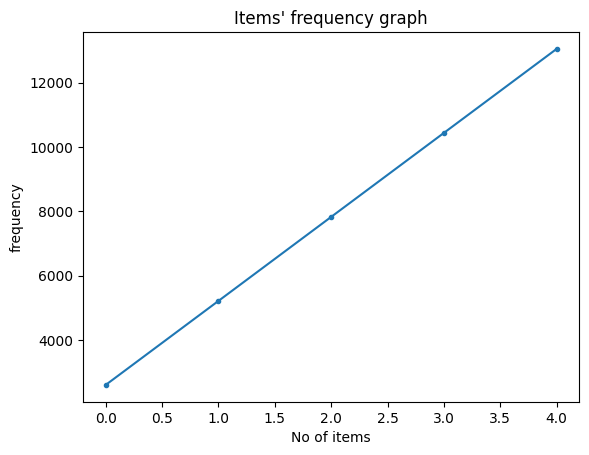

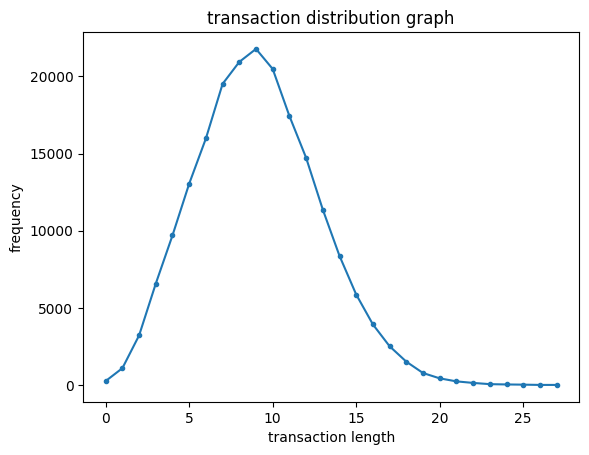

In [5]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 300 (in count). We can increase or decrease the _minSup_ based on the number of patterns being generated.

In [6]:
minimumSupportCount = 300  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
maximumPeriodCount = 5000  #maximumPeriodCount is specified in count. However, the users can also specify maximumPeriodCount between 0 and 1.

### Step 4: Mining Uncertain Periodic Frequent patterns using UPFPGrowth

In [7]:
from PAMI.uncertainPeriodicFrequentPattern.basic import UPFPGrowth as alg #import the algorithm

obj = alg.UPFPGrowth(iFile=inputFile, minSup=minimumSupportCount, maxPer=maximumPeriodCount, sep='\t') #initialize
obj.startMine()            #start the mining process

obj.save('uncertainPeriodicFrequentPatternsAtMinSupCount300.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Periodic frequent patterns were generated successfully using UPFP algorithm
Total No of patterns: 763
Runtime: 209.6438012123108
Memory (RSS): 1070796800
Memory (USS): 1048141824


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minSup_ value.

In [8]:
!head 'uncertainPeriodicFrequentPatternsAtMinSupCount300.txt'

940:301.77099999999956:2419 
714:303.13399999999984:2000 
264:304.0479999999999:1821 
88:304.0499999999999:1548 
981:305.04100000000017:1981 
218:306.1089999999999:1561 
67:308.7309999999998:2622 
64:309.3460000000003:2233 
301:309.35899999999987:2326 
696:310.68399999999957:2261 


The storage format is: _uncertainPeriodicfrequentPattern:support_
***

## Part 2: Evaluating the UPFPGrowth algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [12]:
#Import the libraries
from PAMI.uncertainPeriodicFrequentPattern.basic import UPFPGrowth as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'uncertain_Temporal_T10I4D200K.csv'
seperator='\t'
minimumSupportCountList = [1000, 2000, 3000, 4000, 5000]
maxPer = 5000
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of UPFPGrowth

In [13]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of UPFPGrowth algorithm

### Step 3: Execute the algorithm at different minSup values

In [14]:
for minSupCount in minimumSupportCountList:
    obj = alg.UPFPGrowth(inputFile, minSup=minSupCount, maxPer=maxPer, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['UPFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Periodic frequent patterns were generated successfully using UPFP algorithm
Periodic frequent patterns were generated successfully using UPFP algorithm
Periodic frequent patterns were generated successfully using UPFP algorithm
Periodic frequent patterns were generated successfully using UPFP algorithm
Periodic frequent patterns were generated successfully using UPFP algorithm


### Step 4: Print the Result

In [15]:
print(result)

    algorithm  minSup  patterns    runtime      memory
0  UPFPGrowth    1000       337  31.792004  1906810880
1  UPFPGrowth    2000       134  13.526908  1778401280
2  UPFPGrowth    3000        46  13.465731  1706160128
3  UPFPGrowth    4000        22  13.412906  1693159424
4  UPFPGrowth    5000        10  13.989586  1685934080


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

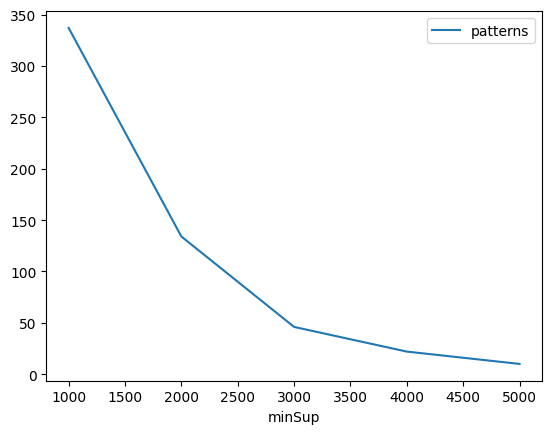

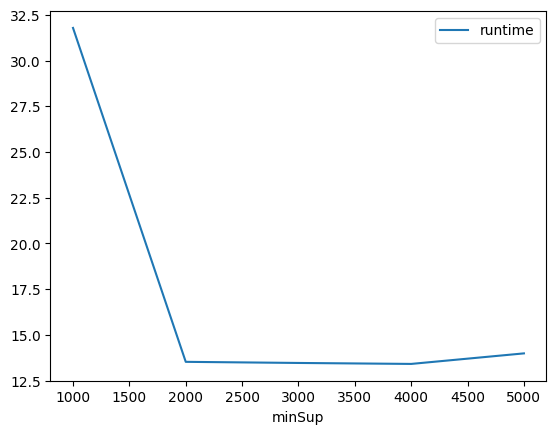

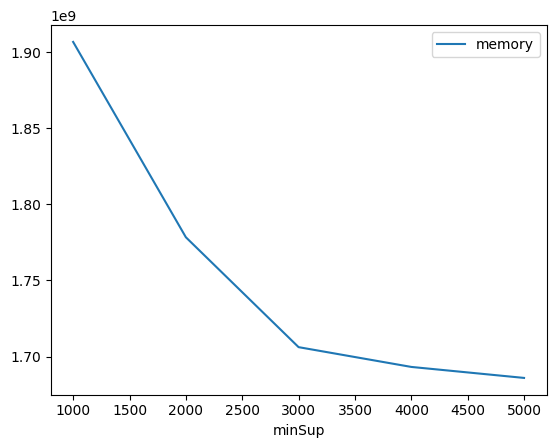

In [16]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib